# Import the Dependencies

In [22]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
%matplotlib inline

In [14]:
tf.__version__

'2.6.0'

# Load the dataset

In [2]:
df = pd.read_csv('D:/DataSets/fake-news/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# EDA

In [3]:
df = df.dropna()

In [4]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [5]:
X=df.drop('label',axis=1)

In [6]:
y=df['label']

In [7]:
y.value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [8]:
X.shape

(18285, 4)

In [9]:
y.shape

(18285,)

<AxesSubplot:xlabel='label', ylabel='count'>

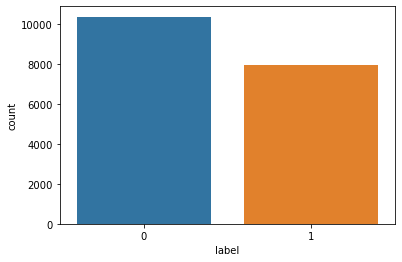

In [12]:
sns.countplot(x = 'label', data=df)

* Always set a vocabulary size. A test of vocabulary size measures how many words a learner knows. It typically measures a learner's knowledge of the form of the word and the ability to link that form to a meaning. A receptive vocabulary size measure looks at the kind of knowledge needed for listening and reading.

In [15]:
# Vocabulary size
# Needs to add in One hot representation
voc_size=5000

# One-Hot Representation

In [17]:
messages = X.copy()

In [19]:
messages.title[1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [20]:
messages.reset_index(inplace=True)

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Devmallya
[nltk_data]     Karar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## Data Preprocessing

In [26]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    text = re.sub('[^a-zA-Z]', ' ', messages.title[i])
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if word not in stopwords.words('english')]
    text = ' '.join(text)
    corpus.append(text)

In [29]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

* A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

In [30]:
# One hot Representation
onehot_repr = [one_hot(word, voc_size) for word in corpus]
onehot_repr

[[3928, 4644, 1241, 715, 2484, 550, 4883, 4444, 3692, 3614],
 [1807, 129, 372, 1258, 1123, 4510, 409],
 [2046, 2260, 4179, 2365],
 [672, 1411, 4848, 3470, 4194, 4634],
 [587, 1123, 988, 888, 7, 4337, 1123, 4716, 4055, 3432],
 [4363,
  4607,
  1799,
  1616,
  1689,
  3363,
  3903,
  1362,
  2203,
  3160,
  1733,
  4367,
  106,
  4596,
  409],
 [4675, 1627, 749, 3379, 1115, 2322, 2764, 4524, 1801, 2485, 1163],
 [3453, 2669, 3671, 3532, 2227, 4545, 3363, 437, 1801, 2485, 1163],
 [924, 1420, 3193, 4096, 1390, 4555, 543, 2289, 3363, 2844],
 [1395, 2613, 3034, 3314, 164, 1617, 4901, 347],
 [3975, 180, 1760, 4841, 186, 2563, 3534, 3987, 2964, 1432, 3959],
 [3470, 567, 2484, 4555, 3363, 2227],
 [3914, 446, 679, 207, 3019, 2257, 3239, 4987, 2938],
 [4313, 3247, 553, 4813, 1618, 276, 1495, 1801, 2485, 1163],
 [3026, 1761, 130, 1754, 2423, 1801, 2485, 1163],
 [33, 4708, 361, 1482, 979, 4552, 1502, 578, 856, 2897],
 [1542, 2668, 129],
 [3641, 1391, 4975, 3400, 3363, 871, 4040, 409],
 [4206, 915, 3

# Embedding Representation

* The key factors for deciding on the optimal embedding dimension are mainly related to the availability of computing resources (smaller is better, so if there's no difference in results and you can halve the dimensions, do so), task and (most importantly) quantity of supervised training.

* Word embeddings also represent words in an array, not in the form of 0s and 1s but continuous vectors. They can represent any word in few dimensions, mostly based on the number of unique words in our text. They are dense, low dimensional vectors. Not hardcoded but are “learned” through data.

* Jeremy Howard provides a general rule of thumb about the number of embedding dimensions: embedding size = min(50, number of categories/2). This Google Blog also tells that a good rule of thumb is 4th root of the number of categories. Therefore, So it's kind of experimental.

* The ratio of vocabulary vs embedding length to determine the size of other layers in a neural network doesn't really matter. Word embeddings are always around 100 and 300 in length, longer embedding vectors don't add enough information and smaller ones don't represent the semantics well enough. What matters more is the network architecture, the algorithm(s) and the dataset size.

* A simple way to understand this concept is that a bidirectional LSTM model with 50 neurons (nodes) followed by a fully connected layer of 70 neurons will outperform a simple MLP of 1000 neurons (nodes) connected to a embedding layer simply due to its architecture. Adding dropout will improve performance as well.

* pad_sequences is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the longest sequence

* Since LSTMs and CNNs take inputs of same length and dimension, input images and sequences are padded to maximum length while testing and training. ... LSTM and CNN take sequential inputs of equal length. Hence, all the inputs should be padded to make the lengths of the inputs equal.

In [31]:
sent_length = 20
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 4444 3692 3614]
 [   0    0    0 ... 1123 4510  409]
 [   0    0    0 ... 2260 4179 2365]
 ...
 [   0    0    0 ... 1801 2485 1163]
 [   0    0    0 ... 2730  514 2155]
 [   0    0    0 ... 3407  381  394]]


In [32]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3928,
       4644, 1241,  715, 2484,  550, 4883, 4444, 3692, 3614])

# Model Building

* There are a few different embedding vector sizes, including 50, 100, 200 and 300 dimensions. You can download this collection of embeddings and we can seed the Keras Embedding layer with weights from the pre-trained embedding for the words in your training dataset.

## LSTM

In [33]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


## BiLSTM

In [34]:
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
len(embedded_docs),y.shape

(18285, (18285,))

In [36]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [37]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# Training of the model

In [39]:
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 18s 56ms/step - loss: 0.3043 - accuracy: 0.8551 - val_loss: 0.2027 - val_accuracy: 0.9153
Epoch 2/10
192/192 [==============================] - 9s 47ms/step - loss: 0.1391 - accuracy: 0.9476 - val_loss: 0.1936 - val_accuracy: 0.9178
Epoch 3/10
192/192 [==============================] - 9s 49ms/step - loss: 0.0959 - accuracy: 0.9642 - val_loss: 0.2706 - val_accuracy: 0.9123
Epoch 4/10
192/192 [==============================] - 11s 59ms/step - loss: 0.0688 - accuracy: 0.9754 - val_loss: 0.3263 - val_accuracy: 0.9112
Epoch 5/10
192/192 [==============================] - 10s 54ms/step - loss: 0.0472 - accuracy: 0.9848 - val_loss: 0.3308 - val_accuracy: 0.9130
Epoch 6/10
192/192 [==============================] - 12s 64ms/step - loss: 0.0321 - accuracy: 0.9893 - val_loss: 0.3698 - val_accuracy: 0.9102
Epoch 7/10
192/192 [==============================] - 10s 51ms/step - loss: 0.0258 - accuracy: 0.9929 - val_loss: 0.3927 - val_accuracy: 0

# Evaluation

In [55]:
y_pred1=model1.predict(X_test)
y_pred1 = np.round(abs(y_pred1))
y_pred1              

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [56]:
from sklearn.metrics import confusion_matrix

In [58]:
confusion_matrix(y_test, y_pred1)

array([[3144,  275],
       [ 250, 2366]], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.9130074565037283

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3419
           1       0.90      0.90      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035

